In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_files
from pyvi import ViTokenizer 
import sklearn.naive_bayes as naive_bayes
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

%matplotlib inline

In [ ]:
data_train = load_files(container_path = "data/news_1135/", encoding = "utf-8")

print(data_train.filenames[0:3])
print()

print("Tong so file: {}".format(len(data_train.filenames)))
print("Danh sách 10 nhãn và id tương ứng: ", [(idx, name) for idx, name in enumerate(data_train.target_names[0:10])] )

['data/news_1135/Thể thao/2e62de81ade8318f66cc740f5ede5607ea1bf002.txt'
 'data/news_1135/Thể thao/f9bd156031140a7db52ae51de4561f234a0eb277.txt'
 'data/news_1135/Thể thao/aeeb3b3b0dfc936de928f0b004259aca70aa4efa.txt']

Tong so file: 224
Danh sách 10 nhãn và id tương ứng:  [(0, 'Giải trí'), (1, 'Khoa học - Công nghệ'), (2, 'Kinh tế'), (3, 'Pháp luật'), (4, 'Sức khỏe'), (5, 'Thể thao'), (6, 'Thời sự')]


In [4]:
print("Content of the first text: ", data_train.data[0])
print("Label of the first text: ", data_train.target_names[0]) 

Content of the first text:  Dân_trí Sáng 5/12 , giải quần_vợt các tay_vợt xuất_sắc Việt_Nam - Cúp Vietravel 2016 đã chính_thức khai_mạc tại TP Vinh - Nghệ_An . Tham_dự giải hơn 30 tay_vợt xuất_sắc nhất của Liên_đoàn quần_vợt Việt_Nam . Dự lễ khai_mạc có ông Nguyễn Trọng Hổ - Vụ_trưởng Vụ thể_thao thành_tích cao II ; Đoàn Quốc Cường - Trưởng bộ_môn quần_vợt Liên_đoàn quần_vợt Việt_Nam ; Nguyễn Quốc Kỳ - Tổng_Giám_đốc Viettravel , Phó_Chủ_tịch kiêm Tổng_thư_ký Liên_đoàn quần_vợt Việt_Nam cùng lãnh_đạo tỉnh Nghệ_An . Giải quần_vợt các cây_vợt xuất_sắc Việt_Nam - Cup Vietravel 2016 do Liên_đoàn Quần_vợt Việt_Nam VTF phối_hợp với Sở VH - TT - DL và Liên_đoàn quần_vợt Nghệ_An NTF tổ_chức ; là giải đấu chuyên_nghiệp quốc_gia lần đầu_tiên được tổ_chức tại Nghệ_An . Ông Nguyễn Quốc Kỳ - PCT kiêm TTK Liên_đoàn quần_vợt Việt_Nam Tham_gia giải lần này có 22 VĐV nam , 9 VĐV nữ có điểm xếp_hạng cao nhất của bộ_môn quần_vợt chuyên_nghiệp , đến từ các trung_tâm quần_vợt lớn trong cả nước như : Thành_p

In [ ]:
# load dữ liệu các stopwords 
with open("data/vietnamese-stopwords.txt",encoding="utf8") as f:
    stopwords = f.readlines()

stopwords = [x.strip().replace(" ", "_") for x in stopwords] 
print("Danh sách 10 từ dừng đầu tiên (từ không mang ý nghĩa phân loại): ", stopwords[:10])
print()

# Transforming data 
# Chuyển hoá dữ liệu text về dạng vector tfidf 
#     - loại bỏ từ dừng
#     - sinh từ điển
module_count_vector = CountVectorizer(stop_words = stopwords)
model_rf_preprocess = Pipeline([('vect', module_count_vector),
                    ('tfidf', TfidfTransformer()),
                    ])
# Hàm thực hiện chuyển đổi dữ liệu text thành dữ liệu số dạng ma trận 
# Input: Dữ liệu 2 chiều dạng numpy.array, mảng nhãn id dạng numpy.array 

# Tiền xử lý với Bag of words
data_bow = module_count_vector.fit_transform(data_train.data, data_train.target)
# Tiền xử lý với TF-IDF
data_tfidf = model_rf_preprocess.fit_transform(data_train.data, data_train.target)

print("10 từ đầu tiên trong từ điển:\n")
i = 0
for k, v in module_count_vector.vocabulary_.items():
    i += 1
    print(i, ": ", (k, v))
    if i > 10:
        break 
print()

Danh sách 10 từ dừng đầu tiên (từ không mang ý nghĩa phân loại):  ['a_lô', 'a_ha', 'ai', 'ai_ai', 'ai_nấy', 'ai_đó', 'alô', 'amen', 'anh', 'anh_ấy']

10 từ đầu tiên trong từ điển:

1 :  ('dân_trí', 1910)
2 :  ('12', 31)
3 :  ('giải', 2248)
4 :  ('quần_vợt', 5047)
5 :  ('tay_vợt', 5655)
6 :  ('xuất_sắc', 7201)
7 :  ('việt_nam', 6947)
8 :  ('cúp', 1574)
9 :  ('vietravel', 6912)
10 :  ('2016', 124)
11 :  ('chính_thức', 1196)



In [6]:
from sklearn.model_selection import train_test_split

X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(data_bow, data_train.target, test_size = 0.2, random_state = 30)
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(data_tfidf, data_train.target, test_size = 0.2, random_state = 30)

print("Dữ liệu training = ", X_train_bow.shape, y_train_bow.shape)
print("Dữ liệu testing = ", X_test_bow.shape, y_test_bow.shape)

print() 
print("Danh sách nhãn và id tương ứng: ", [(idx, name) for idx, name in enumerate(data_train.target_names)])

Dữ liệu training =  (179, 7972) (179,)
Dữ liệu testing =  (45, 7972) (45,)

Danh sách nhãn và id tương ứng:  [(0, 'Giải trí'), (1, 'Khoa học - Công nghệ'), (2, 'Kinh tế'), (3, 'Pháp luật'), (4, 'Sức khỏe'), (5, 'Thể thao'), (6, 'Thời sự')]


In [10]:
for i in range (5):
    print(str(i) + ' : ' + str({data_train.target_names[i]}))

0 : {'Giải trí'}
1 : {'Khoa học - Công nghệ'}
2 : {'Kinh tế'}
3 : {'Pháp luật'}
4 : {'Sức khỏe'}


## Training Models

1. Multinomial Naive Bayes

* Sử dụng BoW

In [15]:
print("Training ...")
# X_train.shape
print("Train size = {}".format(X_train_bow.shape))
model_MNB = naive_bayes.MultinomialNB(alpha = 0.1)
model_MNB.fit(X_train_bow, y_train_bow)
print("model_MNB - train complete")

Training ...
Train size = (179, 7972)
model_MNB - train complete


2. Gaussian Naive Bayes

* Sử dụng TF-IDF

In [18]:
from sklearn.naive_bayes import GaussianNB

print("Training ...")
print("Train size = {}".format(X_train_bow.shape))
model_GNB = GaussianNB(var_smoothing = 1e-3)
model_GNB.fit(X_train_tfidf.toarray(), y_train_tfidf)
print("model_MNB - train complete")

Training ...
Train size = (179, 7972)
model_MNB - train complete


## Model Testing

In [20]:
from sklearn.metrics import accuracy_score

print("Testing ...")
y_pred_bow = model_MNB.predict(X_test_bow)
print("Multinomial Naive Bayes using BoW acc = {}".format(accuracy_score(y_test_bow, y_pred_bow)))

print("Testing ...")
y_pred_tfidf = model_GNB.predict(X_test_tfidf.toarray())
print("Gaussian Naive Bayes using TF-IDF acc = {}".format(accuracy_score(y_test_tfidf, y_pred_tfidf)))

Testing ...
Multinomial Naive Bayes using BoW acc = 0.9555555555555556
Testing ...
Gaussian Naive Bayes using TF-IDF acc = 0.9555555555555556


## Thực hiện sử dụng model đã được train để infer 1 văn bản mới

In [22]:
a = ViTokenizer.tokenize("Trường đại học Bách khoa Hà Nội")
print(a)

Trường đại_học Bách_khoa Hà_Nội


In [23]:
# tiền xử lý dữ liệu sử dụng module module_count_vector.
van_ban_moi = ViTokenizer.tokenize("Công Phượng ghi bàn cho đội tuyển Việt Nam")
# van_ban_moi = ["Công_phượng ghi_bàn cho đội_tuyển Việt_nam"]
print(van_ban_moi)
input_data_preprocessed = module_count_vector.transform([van_ban_moi])
print(input_data_preprocessed)
print()
print("Danh sách nhãn và id tương ứng: ", [(idx, name) for idx, name in enumerate(data_train.target_names)])

Công Phượng ghi_bàn cho đội_tuyển Việt_Nam
<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 5 stored elements and shape (1, 7972)>
  Coords	Values
  (0, 1538)	1
  (0, 2177)	1
  (0, 4837)	1
  (0, 6947)	1
  (0, 7877)	1

Danh sách nhãn và id tương ứng:  [(0, 'Giải trí'), (1, 'Khoa học - Công nghệ'), (2, 'Kinh tế'), (3, 'Pháp luật'), (4, 'Sức khỏe'), (5, 'Thể thao'), (6, 'Thời sự')]


In [30]:
pred = model_MNB.predict(input_data_preprocessed)
print(van_ban_moi, ': ', data_train.target_names[pred[0]], pred)

Công Phượng ghi_bàn cho đội_tuyển Việt_Nam :  Thể thao [5]


## Quan sát độ chính xác trên tập test của GNB khi thay đổi tham số 'var_smoothing'

0.1 0.9555555555555556
0.01 0.9555555555555556
0.001 0.9555555555555556
0.0001 0.9555555555555556
1e-05 0.9555555555555556


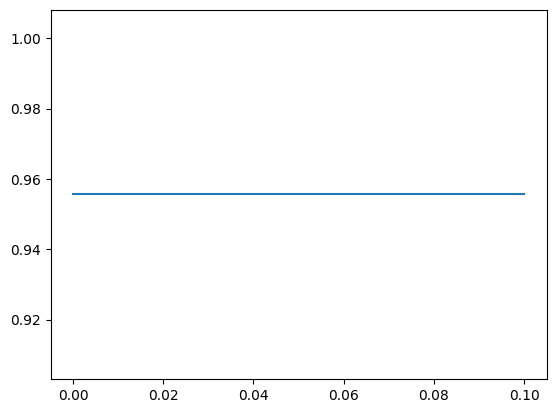

In [31]:
var_smoothings = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
accs = []
for var_smoothing in var_smoothings:
    model_GNB = naive_bayes.GaussianNB(var_smoothing = 1e-3)
    model_GNB.fit(X_train_tfidf.toarray(), y_train_tfidf)
    y_pred_tfidf = model_GNB.predict(X_test_tfidf.toarray())
    acc = accuracy_score(y_test_tfidf, y_pred_tfidf)
    accs.append(acc) 

import seaborn as sns
sns.lineplot(x=var_smoothings, y = accs)

for i in range(len(accs)):
    print(var_smoothings[i], accs[i])
